In [1]:
# bibliotecas necessárias

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Seed para reprodutibilidade.
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
# Padrao X num pixel 5x5
def generate_x_image():
    return np.array([
        [1, 0, 0, 0, 1],
        [0, 1, 0, 1, 0],
        [0, 0, 1, 0, 0],
        [0, 1, 0, 1, 0],
        [1, 0, 0, 0, 1]
    ])

In [4]:
# nao x
def generate_not_x_image():
    # garantindo q aleatoriamente o padrao nao seja 'x'
    while True:
        img = np.random.randint(2, size=(5, 5))
        if not np.array_equal(img, generate_x_image()):
            return img

In [5]:
# Criando dataset 50% x e 50% nao x

num_samples = 1000
images = []
labels = []

for _ in range(num_samples):
    if np.random.rand() > 0.5:
        images.append(generate_x_image())
        labels.append(1)
    else:
        images.append(generate_not_x_image())
        labels.append(0)

images = np.array(images).reshape(-1, 5, 5, 1)
labels = np.array(labels)

In [6]:
# Utilizando o sklearn para dividir em train e test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [8]:
# show imagens

def display_sample_data(images, labels, num_samples=5):
    plt.figure(figsize=(10, 2))
    for i in range(num_samples):
        ax = plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[i].reshape(5, 5), cmap='gray_r')
        plt.title(f'Label: {labels[i]}')
        plt.axis('off')
    plt.show()



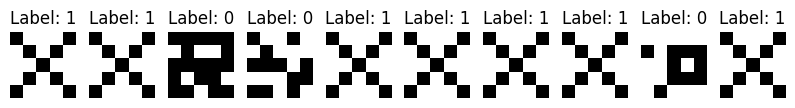

In [10]:
display_sample_data(x_train, y_train,num_samples=10)

In [11]:
#sequencial agrupa layers de um modelo

model = Sequential([
    # 1 - Convolutional Layer
    Conv2D(4, (3, 3), activation='relu', input_shape=(5, 5, 1)),
    # 2 - Max-Pooling Layer
    MaxPooling2D(pool_size=(2, 2)),
    # 3 - Flatten Layer
    Flatten(),
    # 4 - Hidden Layer
    Dense(3, activation='relu'),
    # 5 - Output Layer
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5303 - loss: 0.6387 - val_accuracy: 0.9500 - val_loss: 0.6260
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7993 - loss: 0.6090 - val_accuracy: 0.9800 - val_loss: 0.6076
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9902 - loss: 0.5884 - val_accuracy: 0.9950 - val_loss: 0.5873
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9943 - loss: 0.5673 - val_accuracy: 1.0000 - val_loss: 0.5669
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9949 - loss: 0.5471 - val_accuracy: 1.0000 - val_loss: 0.5483
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9949 - loss: 0.5278 - val_accuracy: 1.0000 - val_loss: 0.5298
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9972 - loss: 0.5088 - val_accuracy: 1.0000 - val_loss: 0.5113
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9972 - loss: 0.4901 - val_accuracy: 1.0000 - val_loss

In [14]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.4522 
Test Accuracy: 100.00%


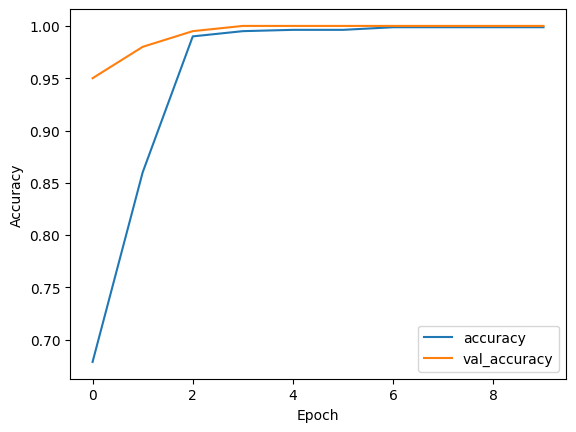

In [15]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [23]:
# Prepara o Input
def prepare_input_image(img):
  img_array = np.array(img).reshape(-1, 5, 5, 1)
  return img_array

# Exemplo
input_image = generate_x_image() #ou generate_not_x_image()
input_image_processed = prepare_input_image(input_image)
prediction = model.predict(input_image_processed)

print(f"Prediction: {prediction}") # Output will be a probability

# Classify based on the probability threshold
threshold = 0.5  # You can adjust the threshold
if prediction > threshold:
  predicted_class = 1
else:
  predicted_class = 0

print(f"Predicted Class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Prediction: [[0.53938]]
Predicted Class: 1
